<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_3/3_3_EM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

## Data Generation

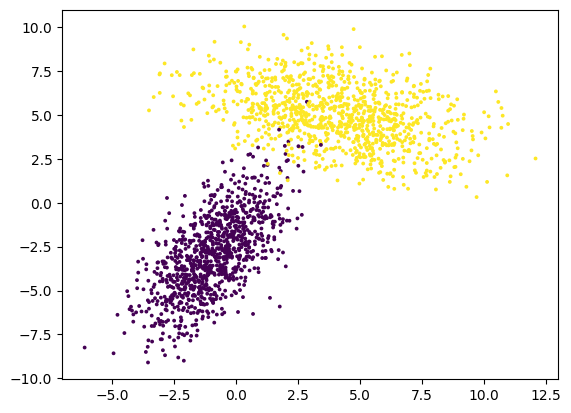

In [2]:
num_points = 1000

mean_1 = [-1, -3]
cov_1 = [[2, 2],
          [2, 5]] #коваріаційна матриця завжди симетрична (cov[i,j] = cov[j,i])
          #diag = дисперсії (розтяг по осях), off-diag = коваріації (нахил еліпсу)
          #дисперсії >=0
          #якщо cov>0 -позитивна кореляція, ознаки зростають разом, еліпс нахилений «↗»
          #якщо cov<0 -негативна кореляція, коли одна ознака зростає, інша має тенденцію спадати, еліпс нахилений «↘»

x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 5]
cov_2 = [[7, -2], [-2, 3]]

rng = np.random.default_rng(0)  # створюємо генератор з seed, фіксуємо seed для відтворюваності
x_1 = rng.multivariate_normal(mean_1, cov_1, num_points)
x_2 = rng.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points)
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)
plt.show()

## Silhouette score

In [3]:
for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')# 'full': кластери еліптичні та з нахилами
    #типи коваріації: full — повна матриця (найгнучкіше), tied — однакові для всіх, diag — тільки діагоналі, spherical — кожен кластер має форму кулі
    #впливає на кількість параметрів, які треба оцінювати
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.6318210419358504
For n_clusters = 3  silhouette average: 0.5281094730913012
For n_clusters = 4  silhouette average: 0.435393910660485


## GMM visualization

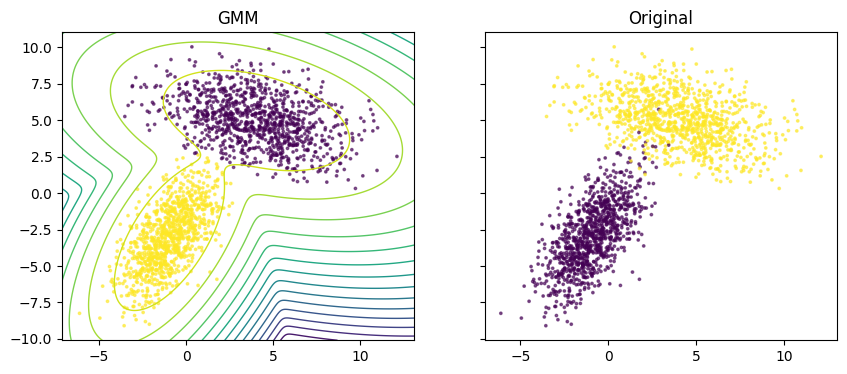

In [4]:
#для візуалізації Gaussian Mixture додамо ізолінії щільності (контури). Це показує, як GMM «бачить» кластери.
# --- навчання GMM ---
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

# --- сітка для контурів ---
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# обчислюємо log-density для кожної точки сітки
zz = gmm.score_samples(grid)
zz = zz.reshape(xx.shape)

# --- візуалізація ---
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax1.set_title('GMM')
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=3, alpha=0.6)
# додаємо ізолінії щільності
ax1.contour(xx, yy, zz, levels=15, linewidths=1)

ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y, s=3, alpha=0.6)

plt.show()